In [87]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [88]:
# import dataset
sales_data = pd.read_csv('sales_data.csv',parse_dates=['Date'])
sales_data.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [89]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [90]:
sales_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Day,113036.0,15.665753,8.781567,1.0,8.0,16.0,23.0,31.0
Year,113036.0,2014.401739,1.272510,2011.0,2013.0,2014.0,2016.0,2016.0
Customer_Age,113036.0,35.919212,11.021936,17.0,28.0,35.0,43.0,87.0
Order_Quantity,113036.0,11.901660,9.561857,1.0,2.0,10.0,20.0,32.0
Unit_Cost,113036.0,267.296366,549.835483,1.0,2.0,9.0,42.0,2171.0
Unit_Price,113036.0,452.938427,922.071219,2.0,5.0,24.0,70.0,3578.0
Profit,113036.0,285.051665,453.887443,-30.0,29.0,101.0,358.0,15096.0
Cost,113036.0,469.318695,884.866118,1.0,28.0,108.0,432.0,42978.0
Revenue,113036.0,754.370360,1309.094674,2.0,63.0,223.0,800.0,58074.0


### Numerical Analysis and Visualization:

In [91]:
sales_data.select_dtypes('number').head()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,26,2013,19,8,45,120,590,360,950
1,26,2015,19,8,45,120,590,360,950
2,23,2014,49,23,45,120,1366,1035,2401
3,23,2016,49,20,45,120,1188,900,2088
4,15,2014,47,4,45,120,238,180,418


In [92]:
sales_data['Unit_Cost'].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

In [93]:
sales_data['Unit_Cost'].agg({'mean','median'})

mean      267.296366
median      9.000000
Name: Unit_Cost, dtype: float64

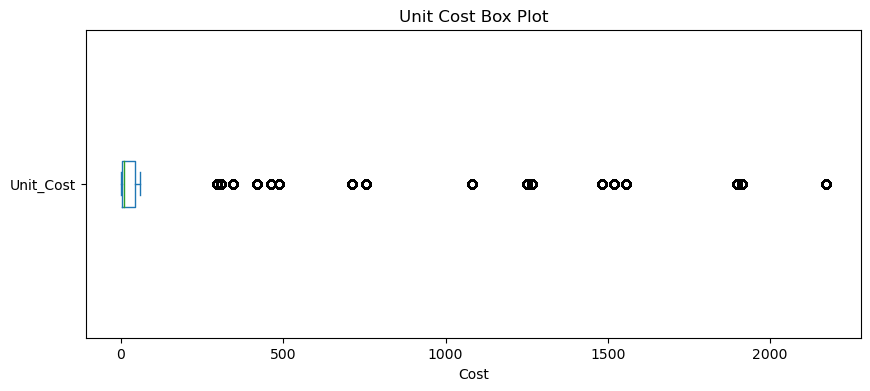

In [94]:
sales_data['Unit_Cost'].plot(kind='box',figsize=(10,4),vert=False)
plt.title('Unit Cost Box Plot')
plt.xlabel('Cost')
plt.show()

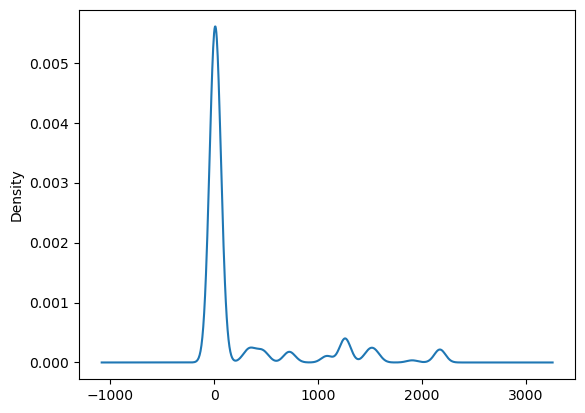

In [97]:
sales_data['Unit_Cost'].plot(kind='kde')
plt.show()

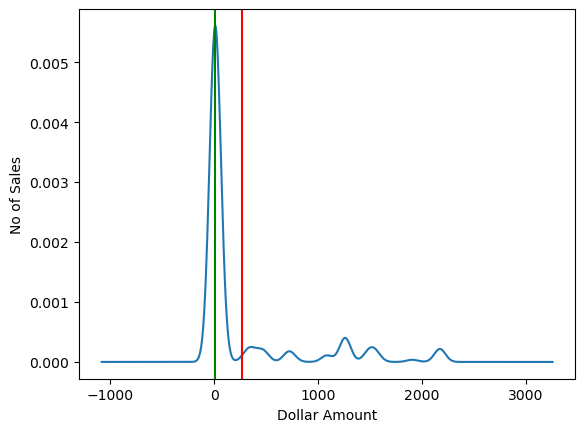

In [100]:
ax = sales_data['Unit_Cost'].plot(kind='kde')
ax.axvline(sales_data['Unit_Cost'].mean(),color='red')
ax.axvline(sales_data['Unit_Cost'].median(),color='green')
plt.xlabel('Dollar Amount')
plt.ylabel('No of Sales')
plt.show()

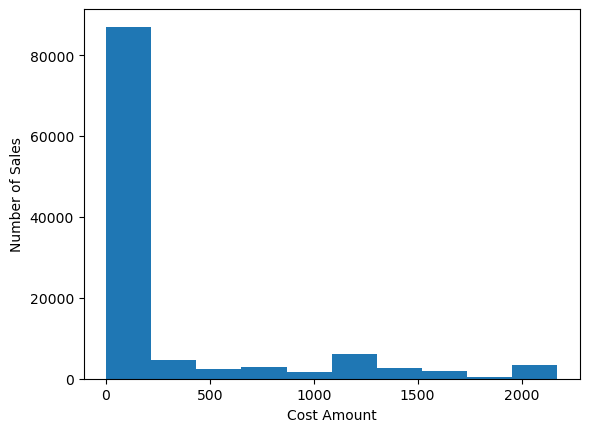

In [102]:
sales_data['Unit_Cost'].plot(kind='hist')
plt.xlabel('Cost Amount')
plt.ylabel('Number of Sales')
plt.show()

### Categorical Analysis and Visualization:

In [107]:
sales_data.select_dtypes('object')

,Month,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product
0,November,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike
1,November,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike
2,March,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike
3,March,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike
4,May,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike
...,...,...,...,...,...,...,...,...
113031,April,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S"
113032,April,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M"
113033,April,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M"
113034,March,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L"


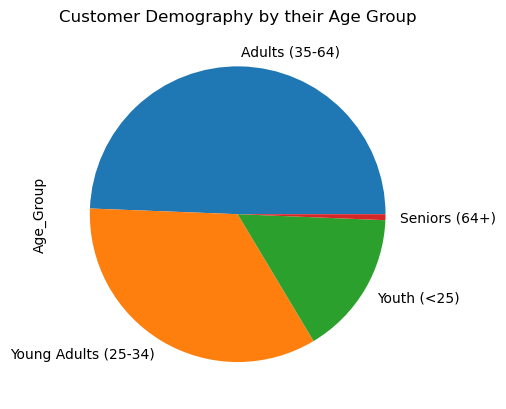

In [123]:
#     percentage of customer
cust_age_demo = sales_data['Age_Group'].value_counts(normalize=True).sort_values(ascending=False)*100
cust_age_demo.plot(kind='pie')
plt.title('Customer Demography by their Age Group')
plt.show()

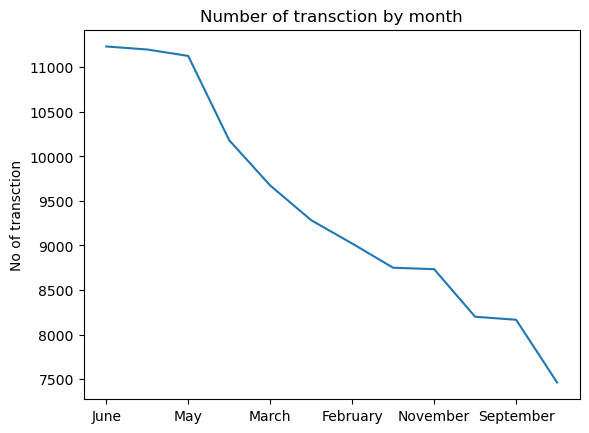

In [128]:
# sales transction frequency by month
sales_by_month = sales_data['Month'].value_counts()
sales_by_month.plot(kind='line')
plt.title('Number of transction by month')
plt.ylabel('No of transction')
plt.xlabel('')
plt.show()

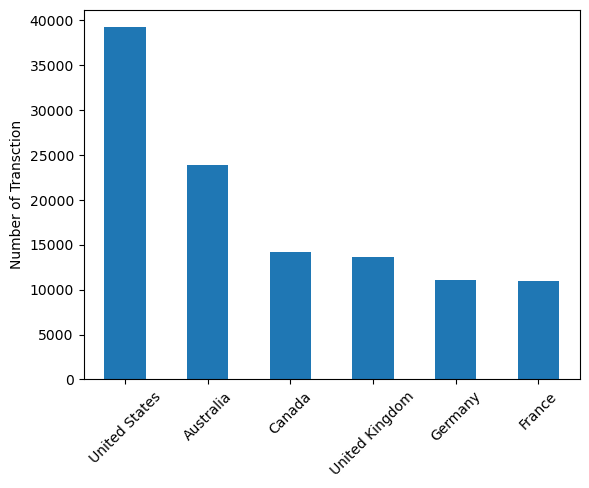

In [143]:
sales_data['Country'].value_counts().plot(kind='bar',rot=45)
plt.ylabel('Number of Transction')
plt.show()

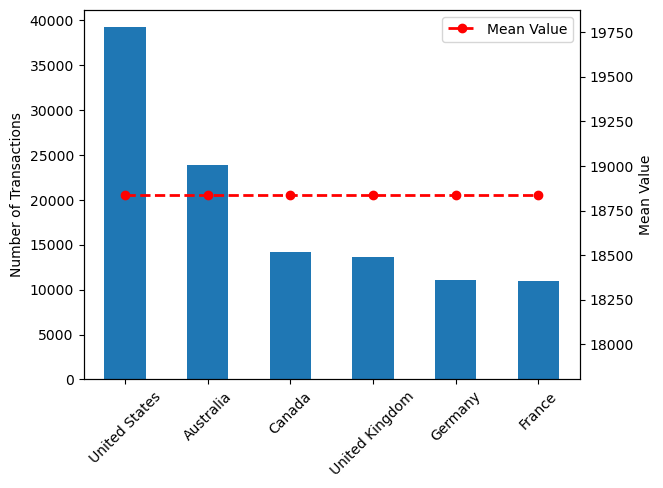

In [150]:
import matplotlib.pyplot as plt

# Assuming 'sales_data' is your DataFrame
country_counts = sales_data['Country'].value_counts()

# Plotting the bar chart
ax = country_counts.plot(kind='bar', rot=45)
plt.ylabel('Number of Transactions')

# Calculate the mean value for each country
country_mean = sales_data.groupby('Country').size().mean()

# Adding a line plot for the mean value on top of the bars
plt.twinx()  # Create a twin Axes sharing the same x-axis
plt.plot(country_counts.index, [country_mean] * len(country_counts), color='red', marker='o', linewidth=2, linestyle='--', label='Mean Value')

# Set labels and legend
plt.ylabel('Mean Value')
plt.legend(loc='upper right')

plt.show()


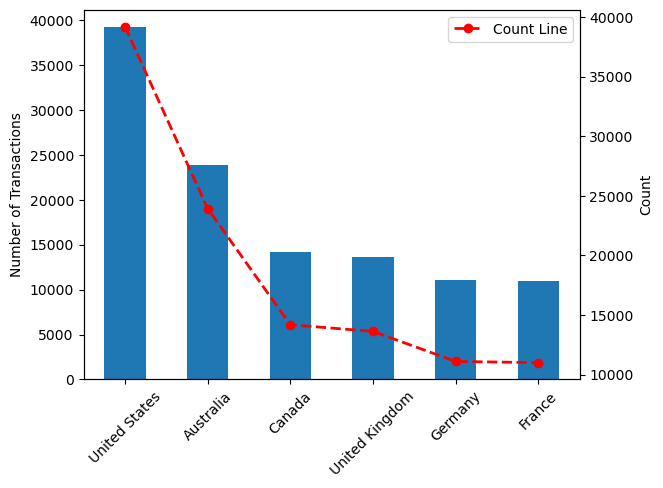

In [151]:

import matplotlib.pyplot as plt

# Assuming 'sales_data' is your DataFrame
country_counts = sales_data['Country'].value_counts()

# Plotting the bar chart
country_counts.plot(kind='bar', rot=45)
plt.ylabel('Number of Transactions')

# Adding a line plot on top
plt.twinx()  # Create a twin Axes sharing the same x-axis
plt.plot(country_counts.index, country_counts.values, color='red', marker='o', linewidth=2, linestyle='--')

# Set labels and legend
plt.ylabel('Count')  # Label for the line plot
plt.legend(['Count Line'], loc='upper right')  # Legend for the line plot

plt.show()

